In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
df = pd.read_excel("System_combined.xlsx")
df.set_index("DateTime", inplace=True)
df.sort_index(ascending=True)
df = df.drop("Unnamed: 0", axis = 1)
df

,systemPrice
DateTime,
2018-01-01 00:00:00,26.263485
2018-01-01 01:00:00,26.382834
2018-01-01 02:00:00,26.043561
2018-01-01 03:00:00,24.585894
2018-01-01 04:00:00,24.626124
...,...
2023-12-31 19:00:00,49.594203
2023-12-31 20:00:00,44.985186
2023-12-31 21:00:00,44.755875


In [65]:
df.isna().sum()

systemPrice    6
dtype: int64

In [66]:
# Using time series interpolation to fill in the 6 missing values 
df['systemPrice'].interpolate(method='time', inplace=True)
df.isna().sum()

systemPrice    0
dtype: int64

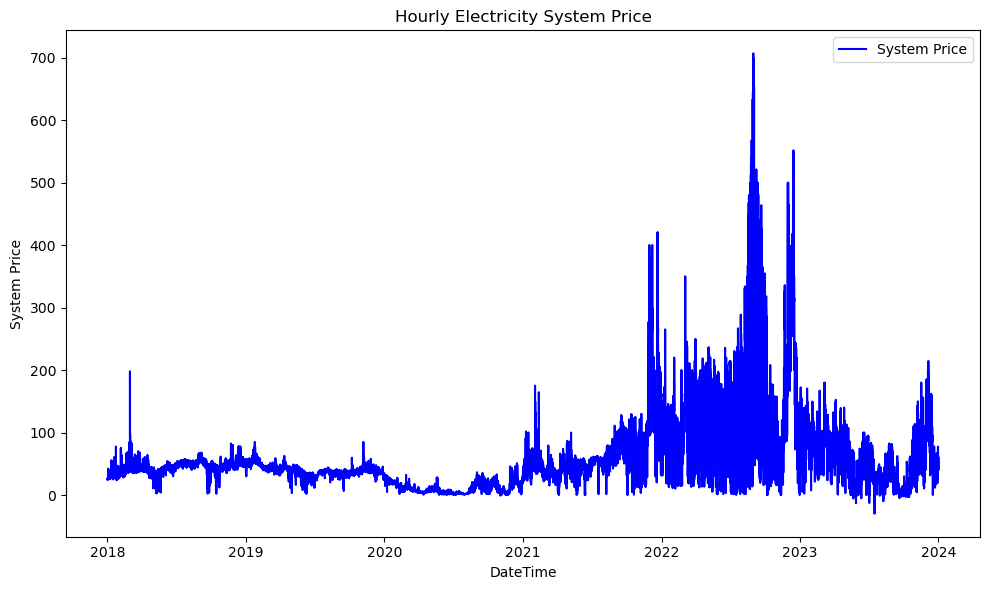

In [67]:
# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(df.index, df['systemPrice'], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels

# To show the plot if not automatically displayed
plt.show()


## Plotting for 2023

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_21939/1500756997.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2023 = df['2023']


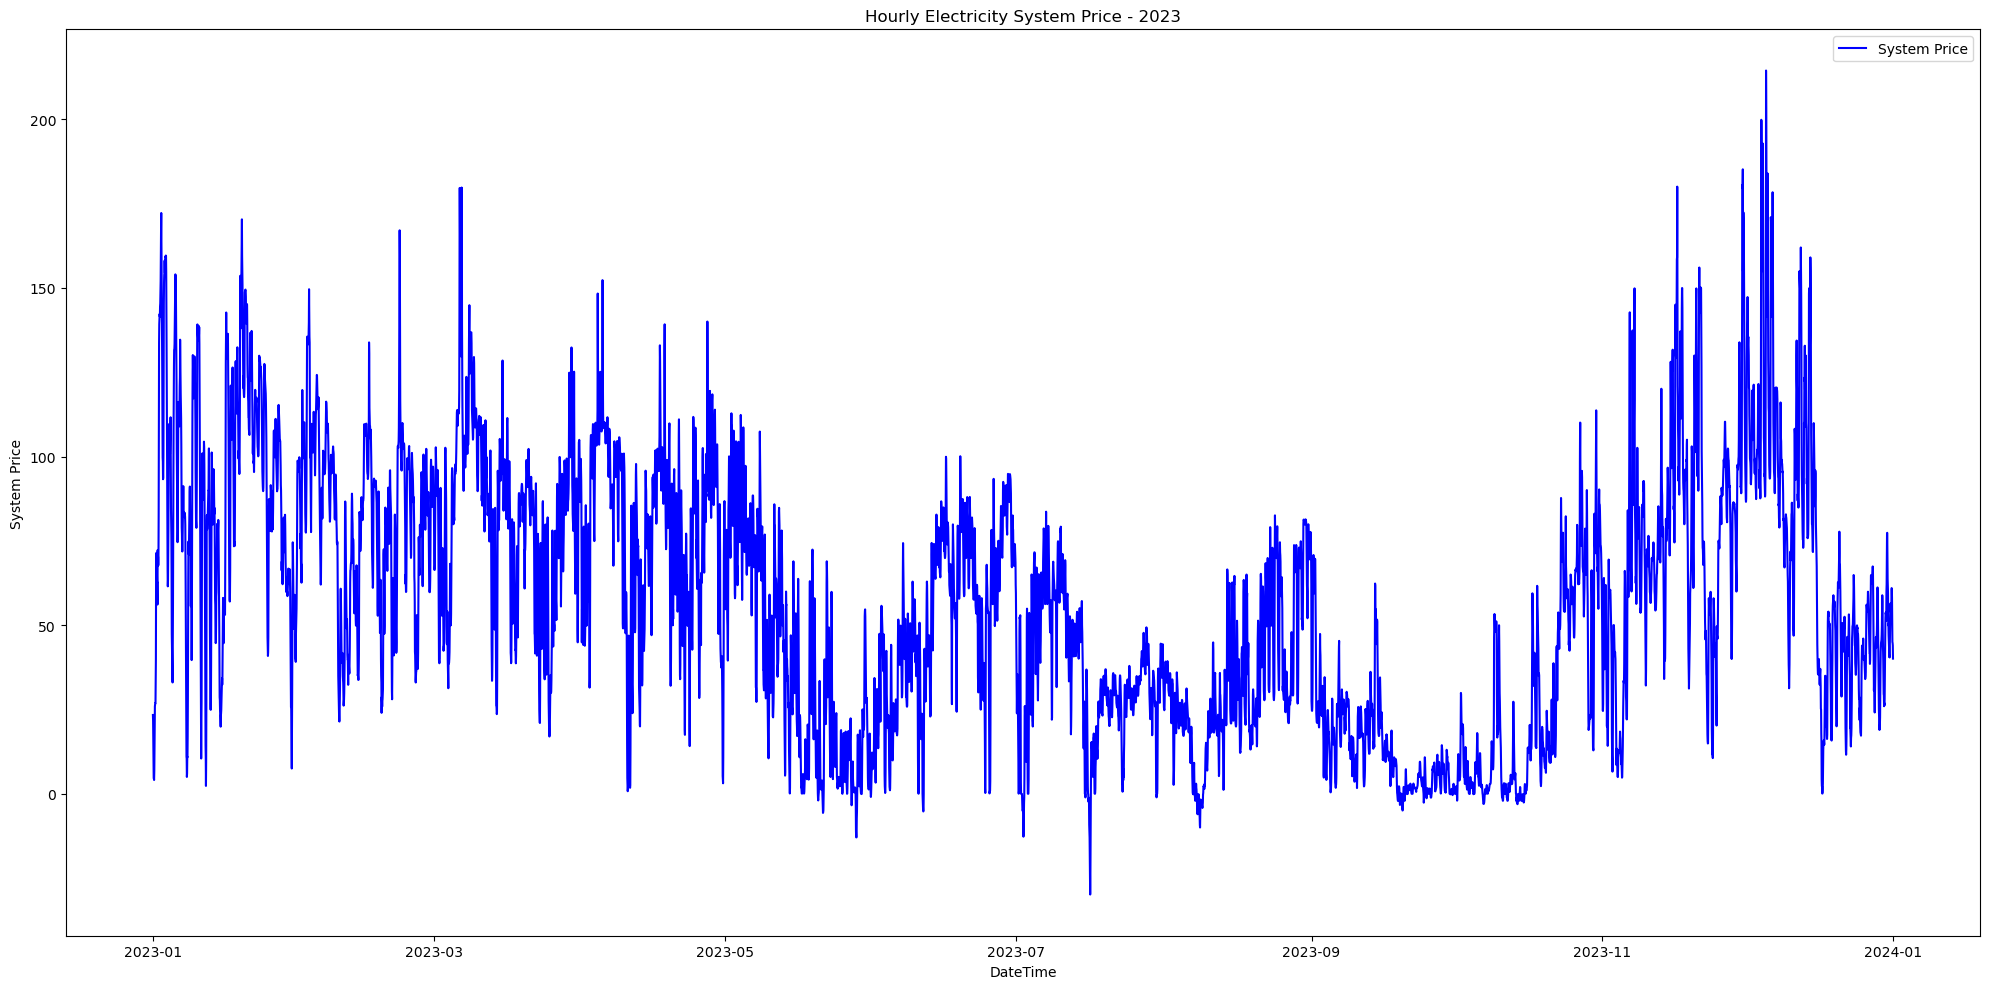

In [68]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the year 2020
df_2023 = df['2023']

plt.figure(figsize=(20, 10))  # Optional: Adjust figure size
plt.plot(df_2023.index, df_2023['systemPrice'], label='System Price', color='blue')  # Plot systemPrice for 2020
plt.title('Hourly Electricity System Price - 2023')  # Title for 2023
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels

# To show the plot if not automatically displayed
plt.show()


## Check for stationarity 

In [69]:
result = adfuller(df_2023['systemPrice'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -5.676678
p-value: 0.000001


<Figure size 1400x700 with 0 Axes>

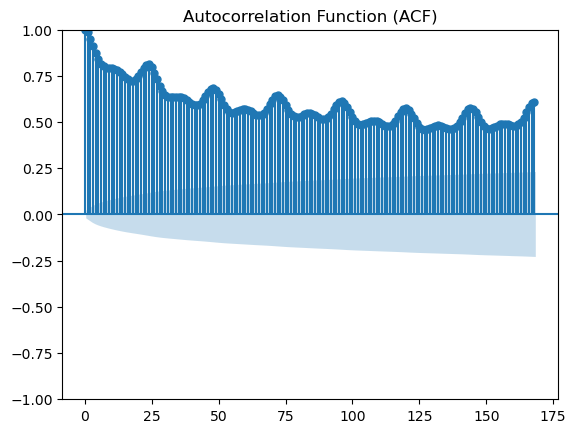

/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1400x700 with 0 Axes>

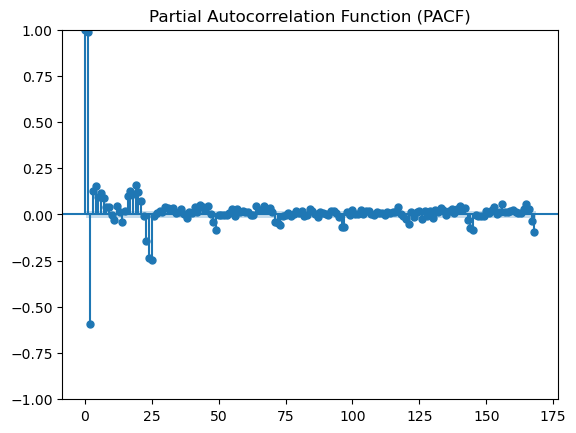

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the ACF
plt.figure(figsize=(14, 7))
plot_acf(df_2023, lags=168)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plotting the PACF
plt.figure(figsize=(14, 7))
plot_pacf(df_2023, lags=168)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## Metode fra Keles (detrend & deseasonalize)

In [223]:
# Assuming 'df_2023' is a DataFrame with a DateTimeIndex and a column 'systemPrice' for the prices

# Calculate the 7-day rolling median for the trend
df_2023['trend'] = df_2023['systemPrice'].rolling(window='7D', center=True).median()

# Remove the trend from the original time series to detrend
df_2023['detrended'] = df_2023['systemPrice'] - df_2023['trend']

# Create columns for hour of the day and day of the week
df_2023['hour'] = df_2023.index.hour
df_2023['day_of_week'] = df_2023.index.dayofweek

# Compute seasonal components
seasonal_components = df_2023.groupby(['day_of_week', 'hour'])['detrended'].transform('median')

# Remove the seasonal components from the detrended time series
df_2023['deseasonalized'] = df_2023['detrended'] - seasonal_components



/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_2500/3113138246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['trend'] = df_2023['systemPrice'].rolling(window='7D', center=True).median()
/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_2500/3113138246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['detrended'] = df_2023['systemPrice'] - df_2023['trend']
/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_2500/3113138246.py:10: SettingWithCopyWarning: 
A

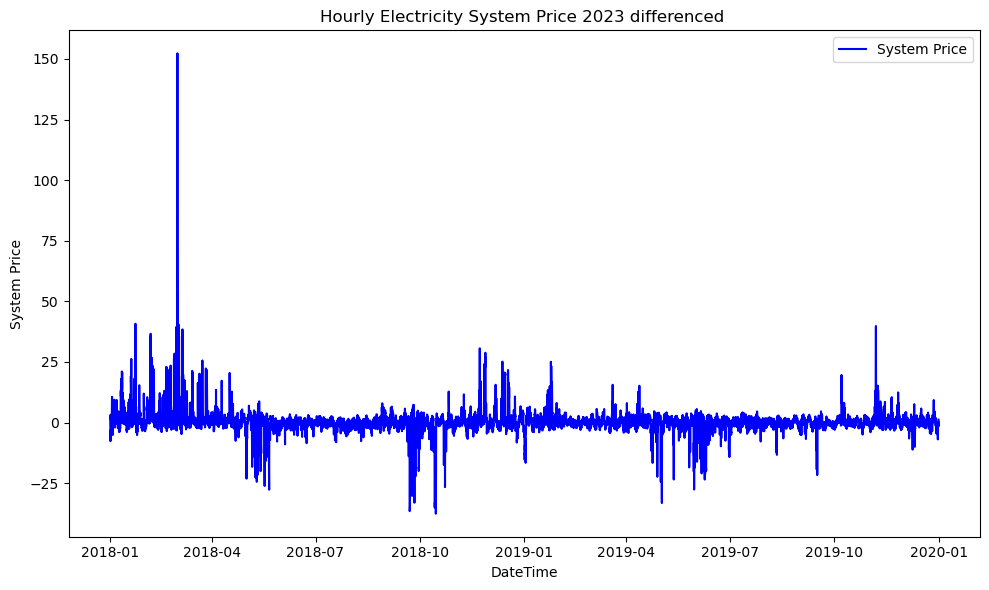

In [225]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(df_2023.index, df_2023["deseasonalized"], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price 2023 differenced ')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels
# To show the plot if not automatically displayed
plt.show()

<Figure size 1400x700 with 0 Axes>

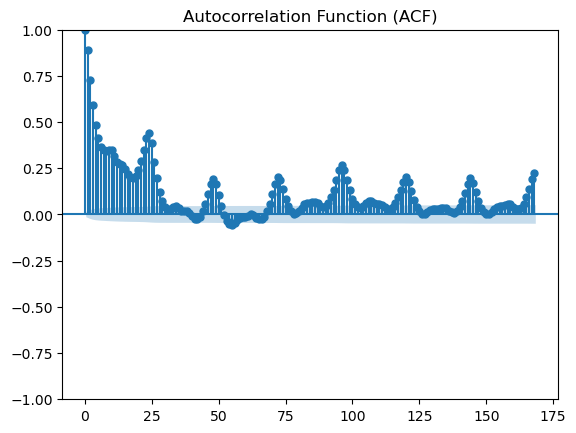

<Figure size 1400x700 with 0 Axes>

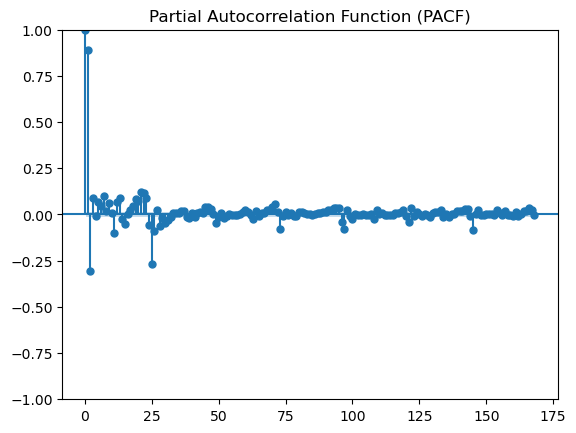

In [230]:
# Plotting the ACF
plt.figure(figsize=(14, 7))
plot_acf(df_2023['deseasonalized'], lags=168)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plotting the PACF
plt.figure(figsize=(14, 7))
plot_pacf(df_2023['deseasonalized'], lags=168)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [231]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF test
adf_result = adfuller(df_2023['deseasonalized'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

# KPSS test
kpss_result = kpss(df_2023['deseasonalized'].dropna(), regression='c')
print('KPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])

ADF Statistic: -15.574166
p-value: 0.000000
KPSS Statistic: 1.195237
p-value: 0.010000


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## "Basic" differencing 

In [316]:
# First, detrend the series
df_2023['detrended'] = df_2023['systemPrice'].diff()

# Drop the NA values that result from differencing
df_2023 = df_2023.dropna()

# Next, deseasonalize the detrended series
df_2023['deseasonalized'] = df_2023['detrended'].diff(24)

# Again, drop the NA values from the second round of differencing
df_2023 = df_2023.dropna()

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_2500/2332189673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['detrended'] = df_2023['systemPrice'].diff()


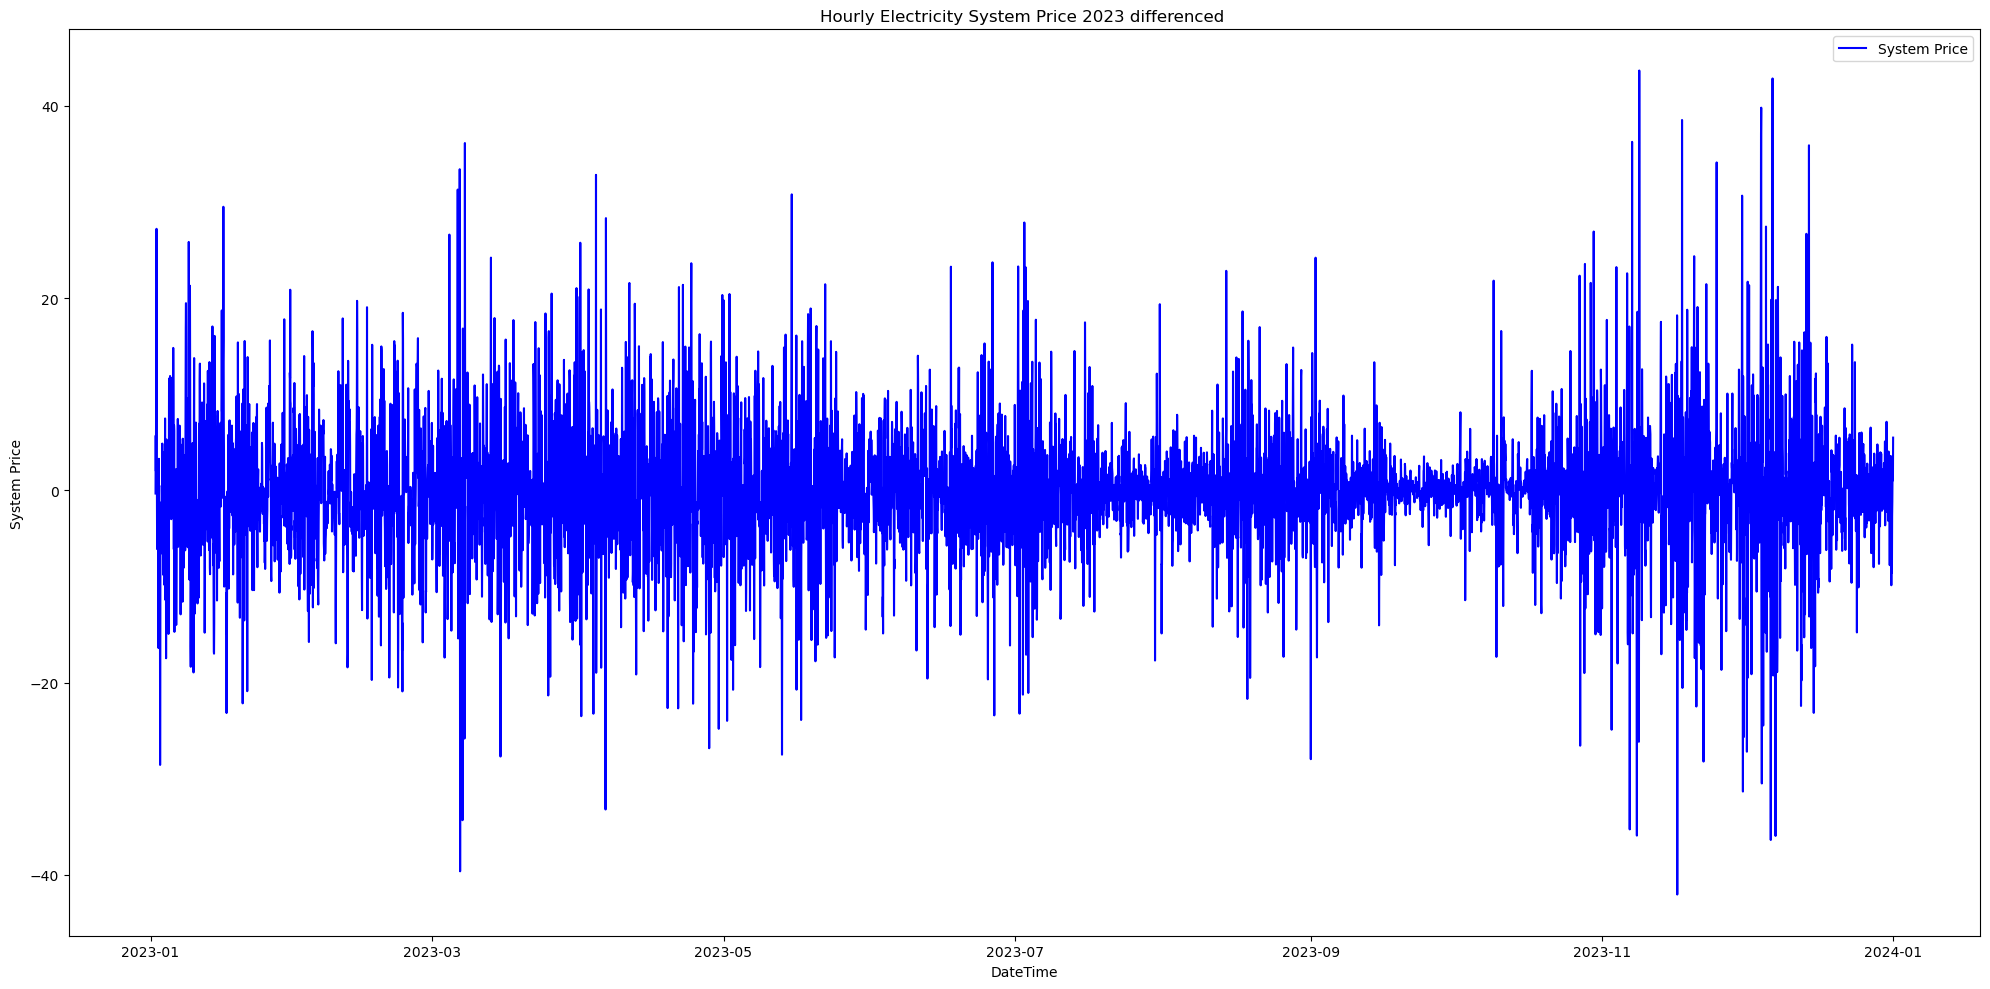

In [317]:
plt.figure(figsize=(20, 10))  # Optional: Adjust figure size
plt.plot(df_2023.index, df_2023["deseasonalized"], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price 2023 differenced ')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels
# To show the plot if not automatically displayed
plt.show()

<Figure size 2000x1000 with 0 Axes>

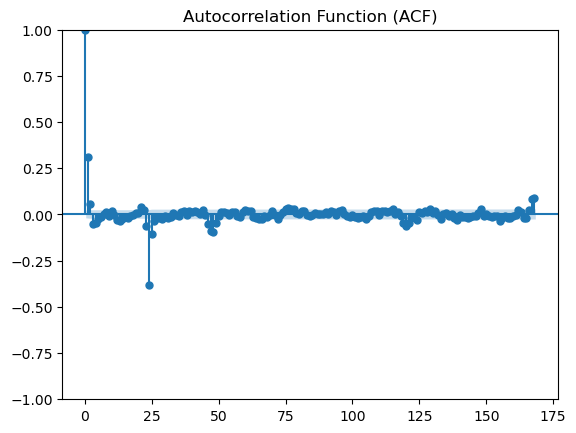

/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

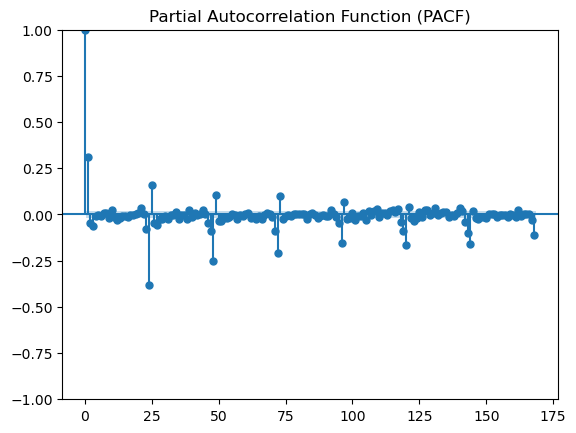

In [318]:
# Plotting the ACF
plt.figure(figsize=(20, 10))
plot_acf(df_2023['deseasonalized'], lags=168)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plotting the PACF
plt.figure(figsize=(20, 10))
plot_pacf(df_2023['deseasonalized'], lags=168)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Trying log tranformation, and then differencing 

In [78]:
# Assuming 'df_2023' is your pandas DataFrame and 'systemPrice' is the column name
min_value = df_2023['systemPrice'].min()

print("The minimum value of systemPrice is:", min_value)

The minimum value of systemPrice is: -29.868093


In [79]:
# Now apply the log transformation
#df_2023['log_systemPrice'] = np.log(df_2023['systemPrice'] + 1)
#df_2023 = df_2023.dropna(subset=['log_systemPrice'])

# Calculate the constant to add: absolute value of the minimum value plus one
constant_to_add = abs(min_value) + 1

# Add the constant to the 'systemPrice' column and take the log
df_2023['log_systemPrice'] = np.log(df_2023['systemPrice'] + constant_to_add)

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_21939/892921433.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['log_systemPrice'] = np.log(df_2023['systemPrice'] + constant_to_add)


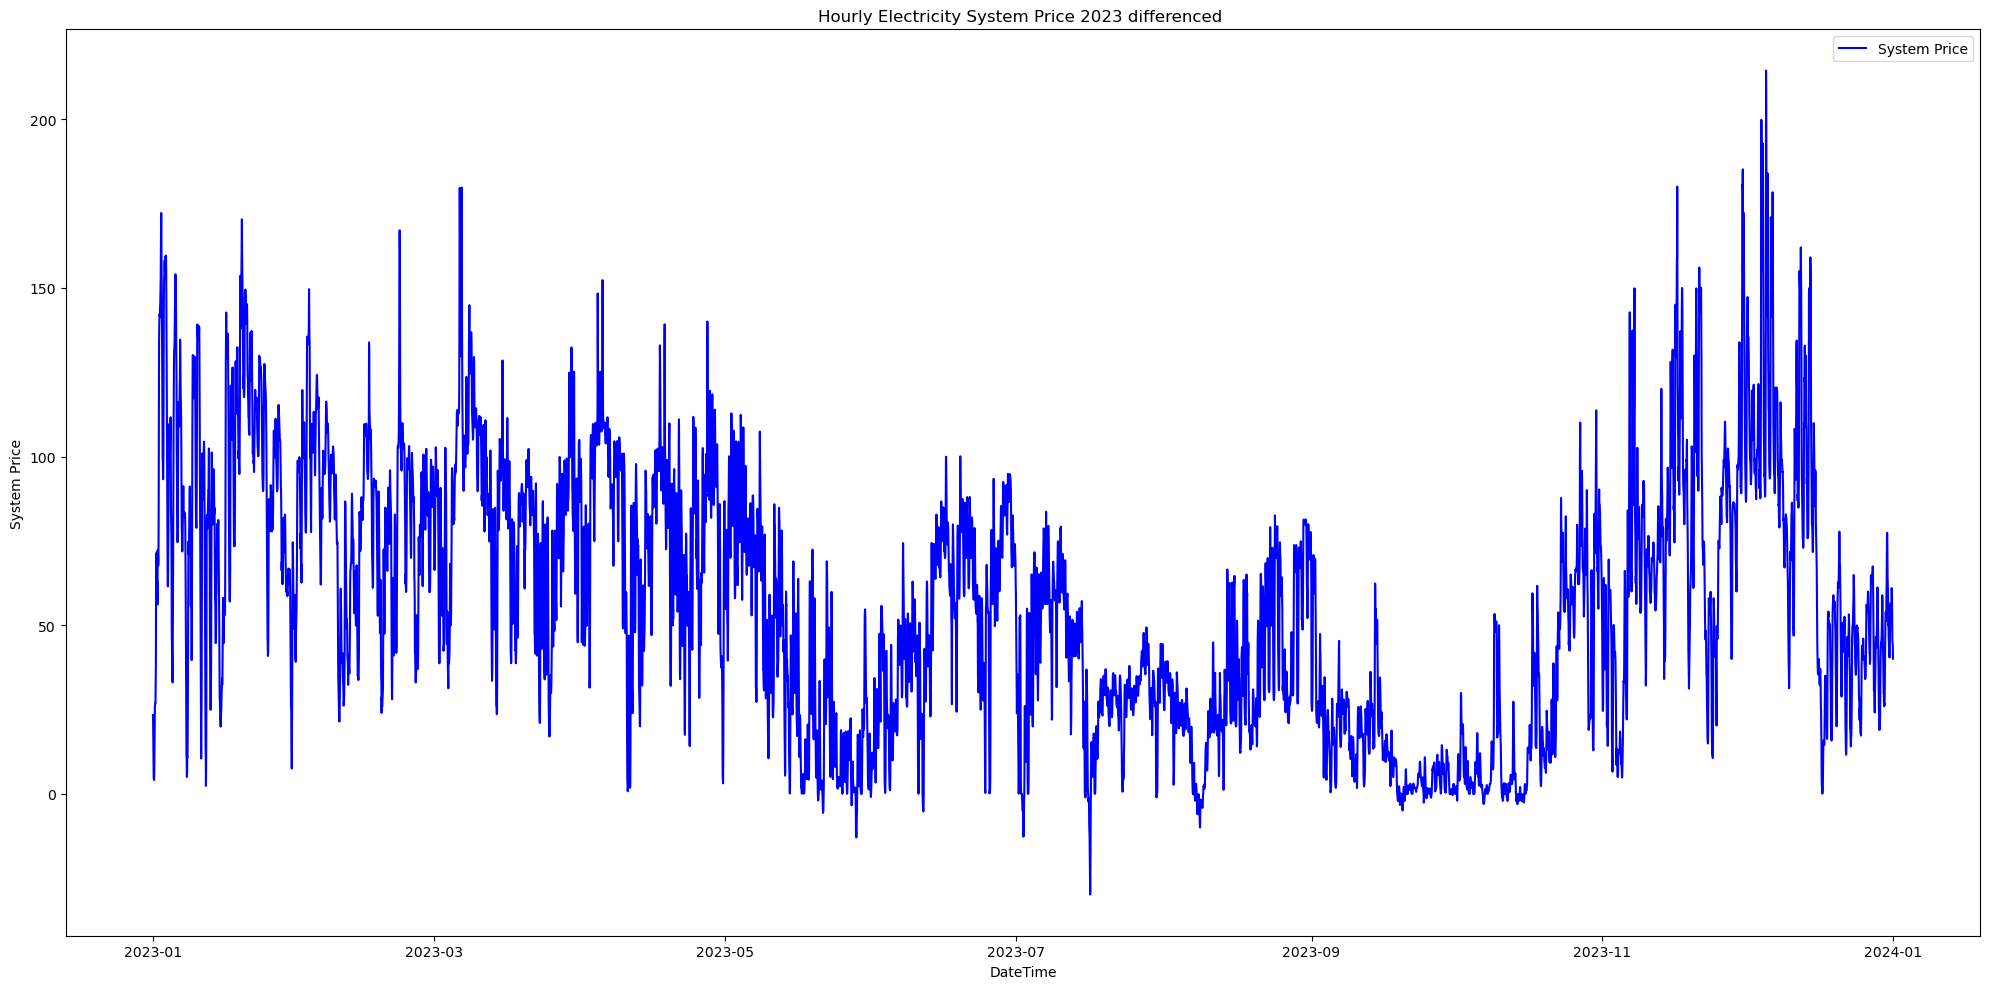

In [80]:
plt.figure(figsize=(20, 10))  # Optional: Adjust figure size
plt.plot(df_2023.index, df_2023["systemPrice"], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price 2023 differenced ')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels
# To show the plot if not automatically displayed
plt.show()

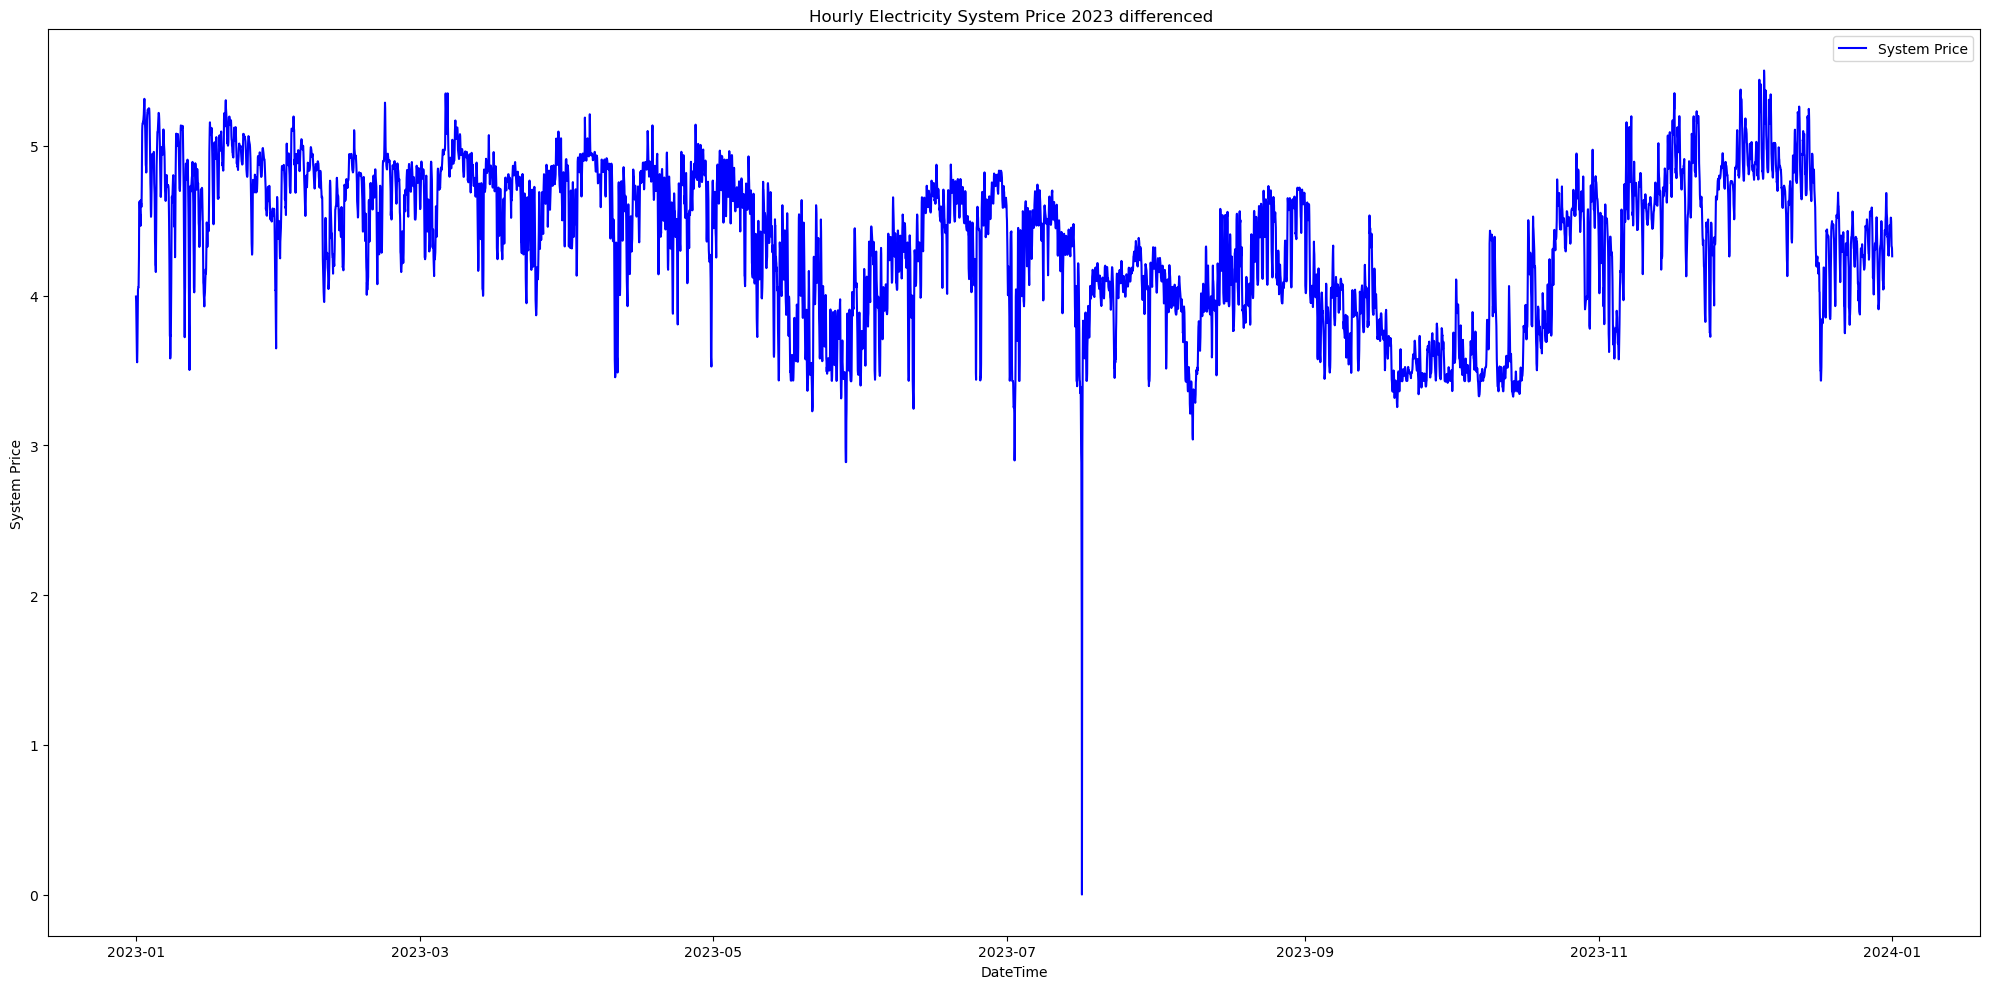

In [81]:
plt.figure(figsize=(20, 10))  # Optional: Adjust figure size
plt.plot(df_2023.index, df_2023["log_systemPrice"], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price 2023 differenced ')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels
# To show the plot if not automatically displayed
plt.show()

In [82]:

import pandas as pd

# Assuming df_2023 is your DataFrame and it contains a column named 'log_systemPrice'
# Cap the minimum value at 3 without changing the maximum value
df_2023['log_systemPrice'] = df_2023['log_systemPrice'].clip(lower=3)





/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_21939/3714444406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['log_systemPrice'] = df_2023['log_systemPrice'].clip(lower=3)


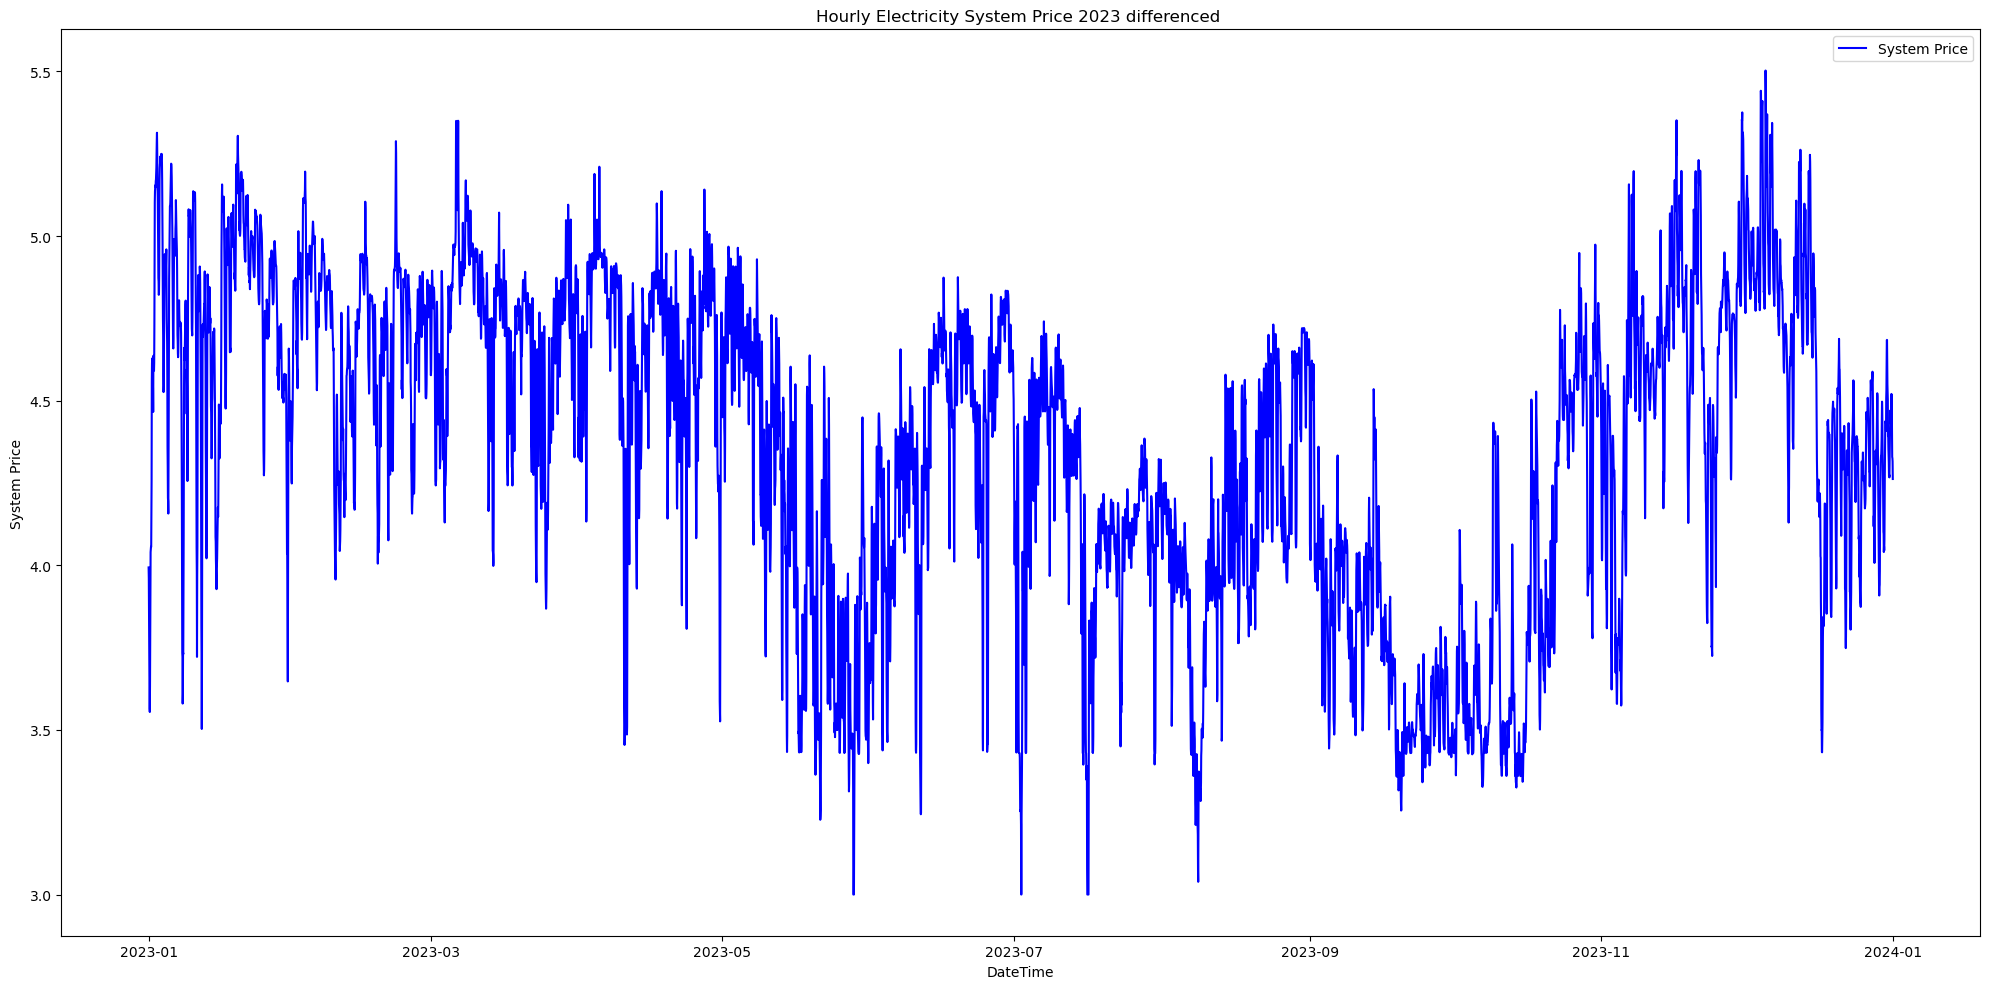

In [83]:
plt.figure(figsize=(20, 10))  # Optional: Adjust figure size
plt.plot(df_2023.index, df_2023["log_systemPrice"], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price 2023 differenced ')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels
# To show the plot if not automatically displayed
plt.show()

In [84]:
# Differencing the log-transformed series
df_2023['log_diff'] = df_2023['log_systemPrice'].diff()

# Drop the NaN values generated by differencing
df_2023 = df_2023.dropna(subset=['log_diff'])

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_21939/3609174589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['log_diff'] = df_2023['log_systemPrice'].diff()


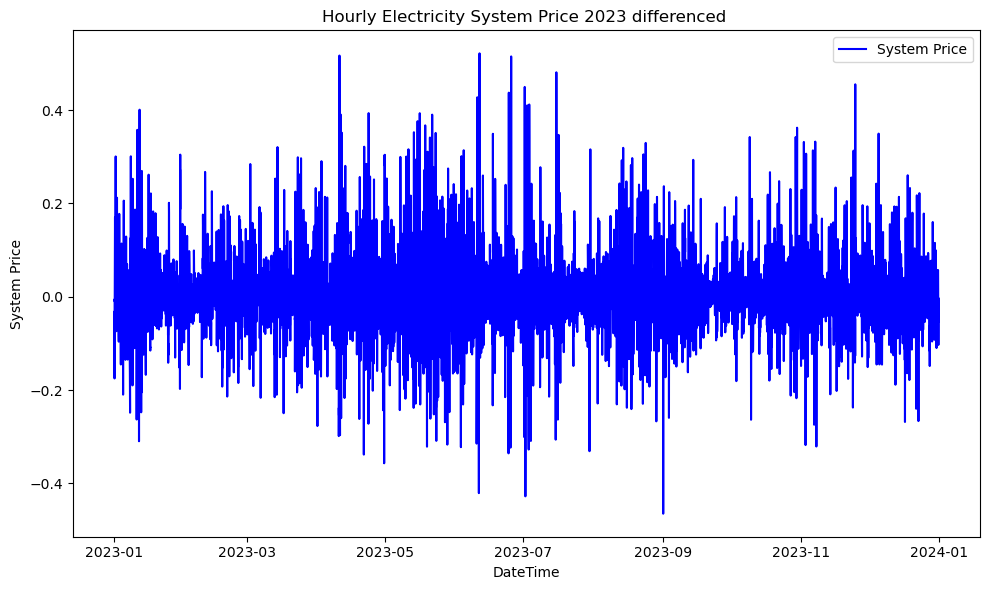

In [85]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(df_2023.index, df_2023["log_diff"], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price 2023 differenced ')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels
# To show the plot if not automatically displayed
plt.show()

<Figure size 2000x1000 with 0 Axes>

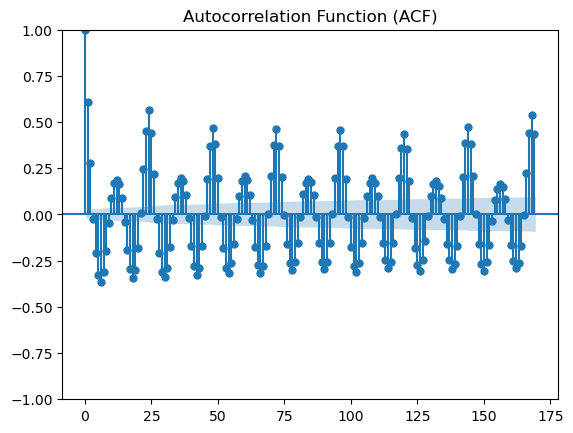

/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

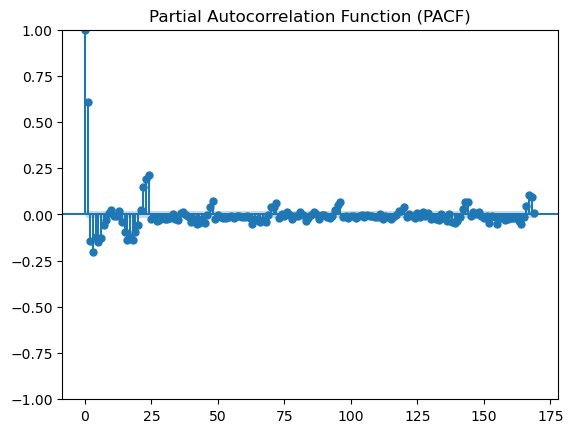

In [86]:
# Plotting the ACF
plt.figure(figsize=(20, 10))
plot_acf(df_2023['log_diff'], lags=169)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plotting the PACF
plt.figure(figsize=(20, 10))
plot_pacf(df_2023['log_diff'], lags=169)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [87]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF test
adf_result = adfuller(df_2023['log_diff'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

# KPSS test
kpss_result = kpss(df_2023['log_diff'].dropna(), regression='c')
print('KPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])


ADF Statistic: -18.326516
p-value: 0.000000
KPSS Statistic: 0.035050
p-value: 0.100000


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [88]:
seasonal_lag = 24
df_2023['log_seasonally_differenced'] = df_2023['log_diff'] - df_2023['log_diff'].shift(seasonal_lag)


In [89]:
# Drop the NaN values generated by differencing
df_2023 = df_2023.dropna(subset=['log_seasonally_differenced'])

<Figure size 2000x1000 with 0 Axes>

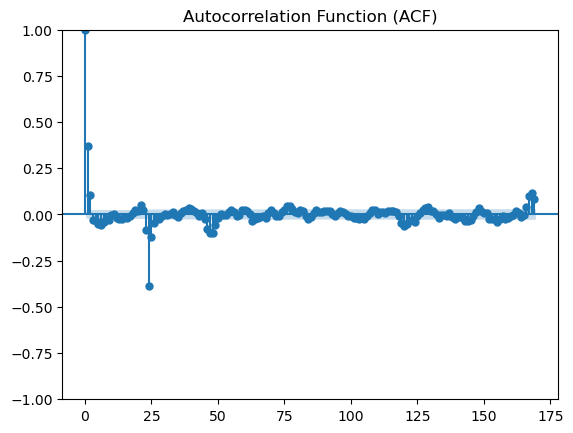

/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

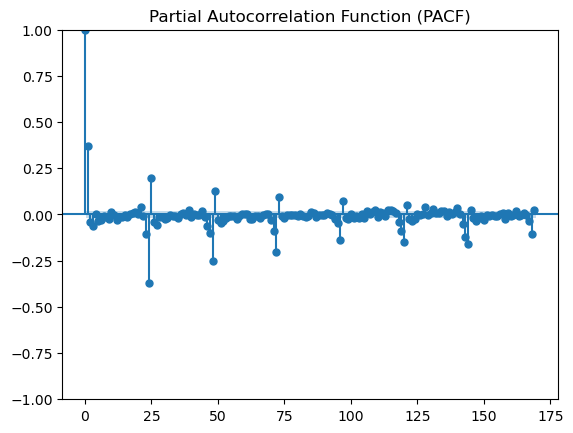

In [90]:
# Plotting the ACF
plt.figure(figsize=(20, 10))
plot_acf(df_2023['log_seasonally_differenced'], lags=169)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plotting the PACF
plt.figure(figsize=(20, 10))
plot_pacf(df_2023['log_seasonally_differenced'], lags=169)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

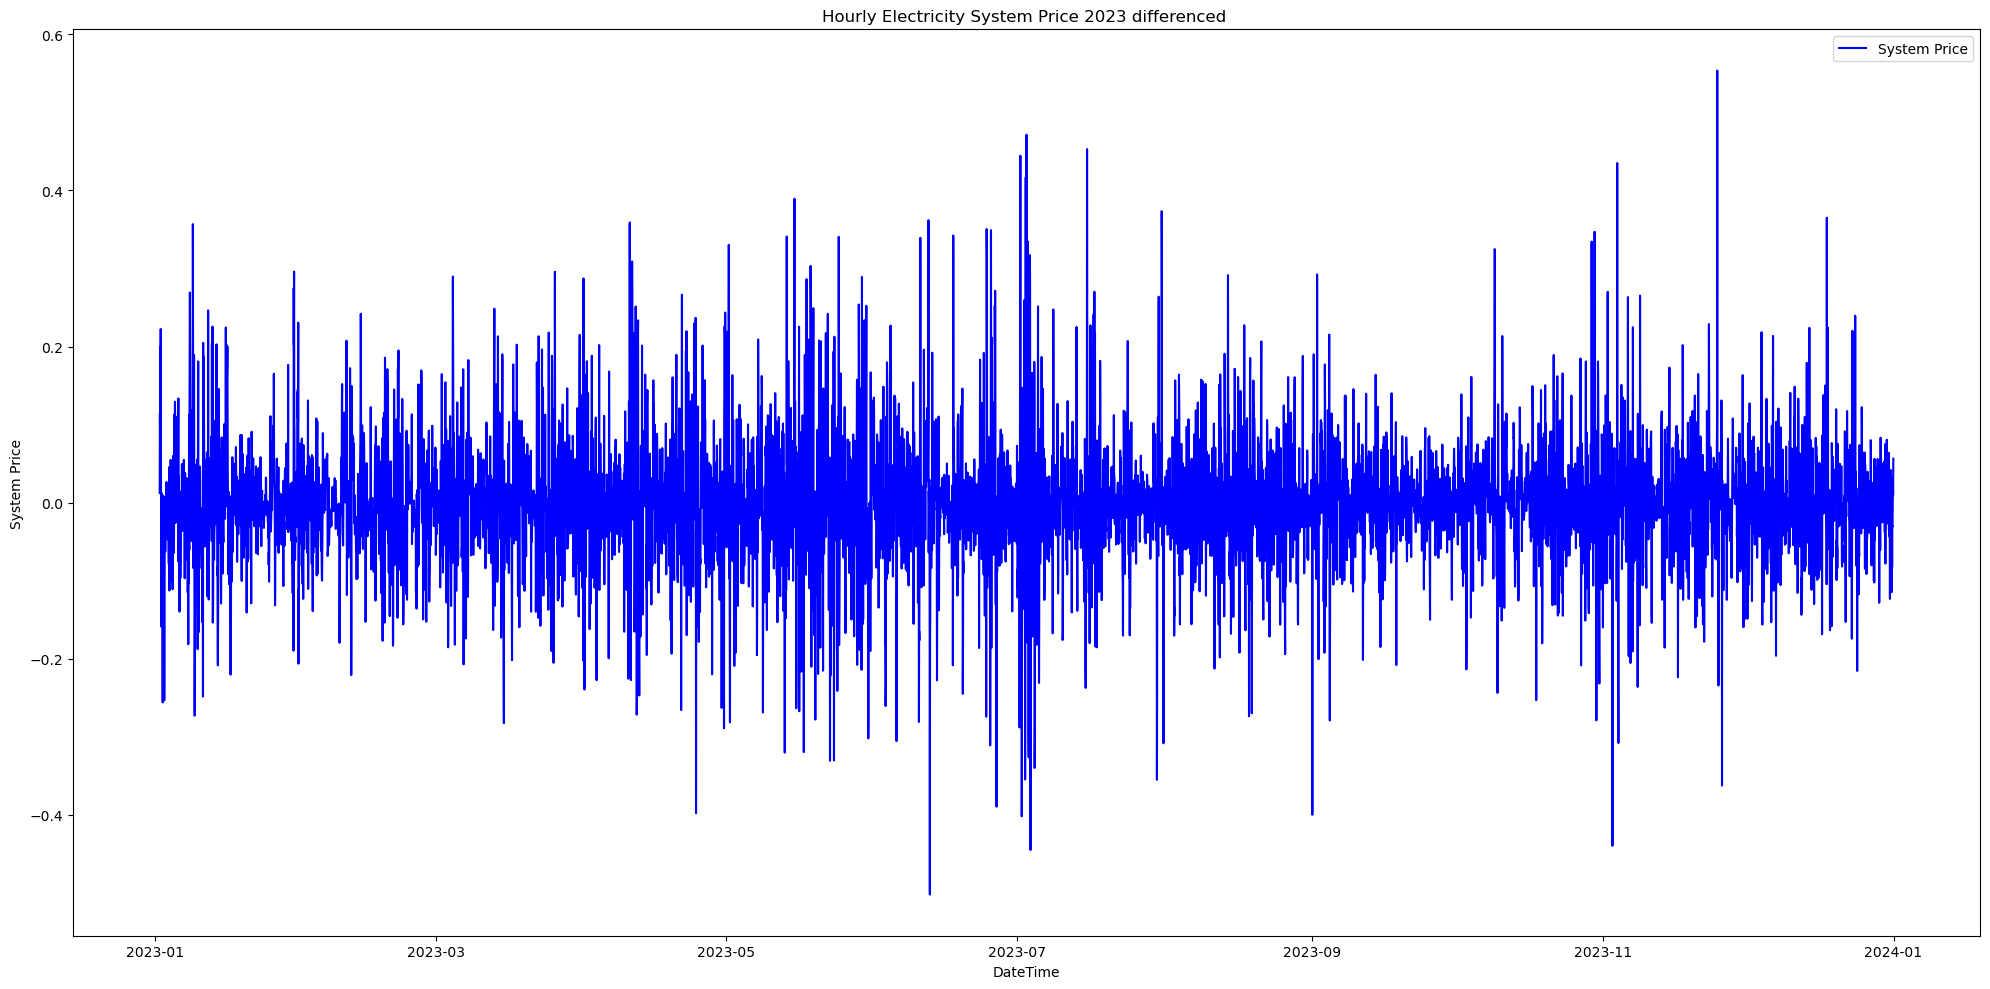

In [91]:
plt.figure(figsize=(20, 10))  # Optional: Adjust figure size
plt.plot(df_2023.index, df_2023["log_seasonally_differenced"], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price 2023 differenced ')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels
# To show the plot if not automatically displayed
plt.show()

In [92]:
# ADF test
adf_result = adfuller(df_2023['log_seasonally_differenced'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

# KPSS test
kpss_result = kpss(df_2023['log_seasonally_differenced'].dropna(), regression='c')
print('KPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])

ADF Statistic: -23.606928
p-value: 0.000000
KPSS Statistic: 0.002864
p-value: 0.100000


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


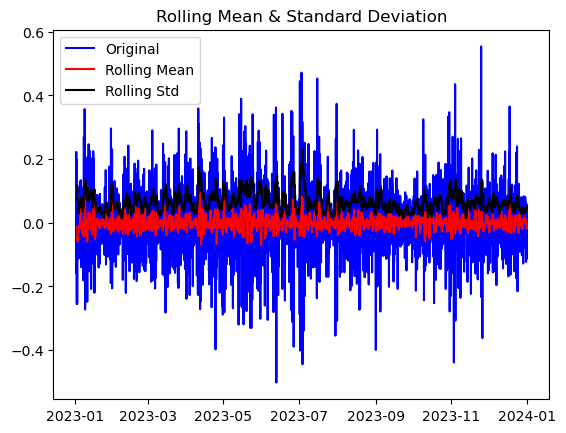

In [93]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

test_stationarity(df_2023["log_seasonally_differenced"])


In [347]:
import pmdarima as pm


train_size = int(len(df_2023) * 0.9)
train = df_2023['log_systemPrice'].iloc[:train_size]

# Use auto_arima to find the best ARIMA model
model = pm.auto_arima(train, seasonal=True, m=24, trace=True,
                      error_action='ignore', suppress_warnings=True,
                      stepwise=True)

# Summary of the model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-20291.800, Time=32.59 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-16086.169, Time=0.74 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-19618.847, Time=6.12 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-19143.412, Time=12.34 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-16088.169, Time=0.19 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-19423.304, Time=30.17 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-19951.732, Time=30.78 sec
 ARIMA(2,1,2)(2,0,1)[24] intercept   : AIC=-20260.337, Time=99.02 sec
 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=-20371.834, Time=131.73 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=-19751.181, Time=120.17 sec
 ARIMA(2,1,2)(2,0,2)[24] intercept   : AIC=inf, Time=161.35 sec
 ARIMA(1,1,2)(1,0,2)[24] intercept   : AIC=inf, Time=109.57 sec
 ARIMA(2,1,1)(1,0,2)[24] intercept   : AIC=inf, Time=106.75 sec
 ARIMA(3,1,2)(1,0,2)[24] intercept   : AIC=inf, Time=137.27 sec
 A

: 

# SARIMA

In [102]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [119]:
#train = df_2023[:'2022-12-31']
#test = df_2023['2023']

# Calculate the split index for 80% of the data
split_idx = int(len(df_2023) * 0.8)

# Split the data into training and test sets based on the calculated index
train = df_2023.iloc[:split_idx]
test = df_2023.iloc[split_idx:]

Box cox transformation before using auto.arima if there is variance. 
Also, remove outliers?

In [122]:
# Assuming predictions and test have already been defined as shown in the previous code

# Find the start date of the test set (which is the end of the train set)
start_test_date = test.index[0]
# Forecast for one week from the start of the test set
end_prediction_date = start_test_date + pd.Timedelta(days=30)

# Initialize an empty series to store predictions for the forecasted week
predictions_first_week = pd.Series(index=pd.date_range(start=start_test_date, end=end_prediction_date, freq='H', closed='left'), dtype='float64')

# Forecast loop for the first week of the test set
for day in pd.date_range(start=start_test_date, end=end_prediction_date, freq='D', closed='left'):
    # Concatenate the train set and the part of the test set up to the day before the current forecasting day
    current_train = pd.concat([train, test[:day - pd.Timedelta(days=1)]], axis=0)
    
    # Fit the SARIMA model
    model = SARIMAX(current_train['log_systemPrice'], 
                    order=(1, 1, 1), 
                    seasonal_order=(1, 1, 2, 24))
    results = model.fit(disp=0)
    
    # Forecast the next 24 hours and store in the predictions
    forecast = results.get_forecast(steps=24).predicted_mean
    predictions_first_week[day:day + pd.Timedelta(days=1) - pd.Timedelta(hours=1)] = forecast

# Now, extract the actual values for the first forecasted week from the test set
actuals_first_week = test.loc[start_test_date:end_prediction_date - pd.Timedelta(hours=1), 'log_systemPrice']
actuals_first_week = np.exp(actuals_first_week)  # Revert log transformation

# Revert log transformation for the predicted values as well
predicted_prices_first_week = np.exp(predictions_first_week)

# Calculate RMSE and MAPE for the forecasted week
rmse_first_week = np.sqrt(mean_squared_error(actuals_first_week, predicted_prices_first_week))
mape_first_week = np.mean(np.abs((actuals_first_week - predicted_prices_first_week) / actuals_first_week)) * 100


/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_2500/1626723943.py:9: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  predictions_first_week = pd.Series(index=pd.date_range(start=start_test_date, end=end_prediction_date, freq='H', closed='left'), dtype='float64')
/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_2500/1626723943.py:12: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  for day in pd.date_range(start=start_test_date, end=end_prediction_date, freq='D', closed='left'):
/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/U

KeyboardInterrupt: 

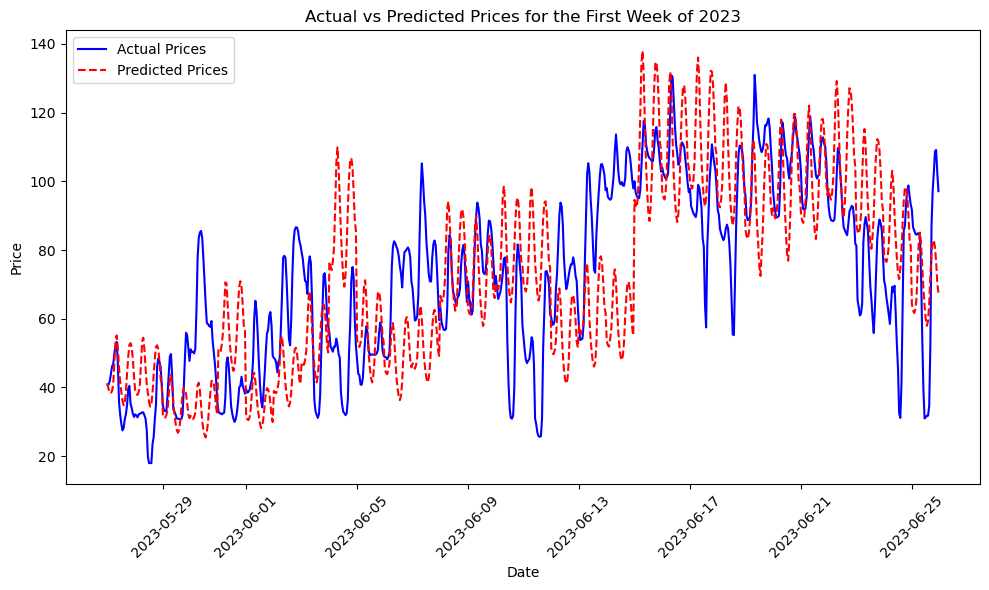

RMSE for the first week: 22.41767042325483
MAPE for the first week: 29.548456088153653


In [121]:
# Plotting the predictions with the actual values
plt.figure(figsize=(10, 6))
plt.plot(actuals_first_week.index, actuals_first_week, label='Actual Prices', color='blue')
plt.plot(predicted_prices_first_week.index, predicted_prices_first_week, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices for the First Week of 2023')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'RMSE for the first week: {rmse_first_week}')
print(f'MAPE for the first week: {mape_first_week}')

In [46]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df_2023' is your DataFrame with 'log_systemPrice' being the log-transformed system price column
# Splitting the data into train and test sets (80% train, 20% test)
train_size = int(len(df_2023) * 0.8)
train, test = df_2023[0:train_size], df_2023[train_size:len(df_2023)]


In [86]:
# Define the order (p, d, q) and the seasonal_order (P, D, Q, s)
# Replace with your determined best parameters
order = (1, 1, 2)  # Example non-seasonal order
seasonal_order = (1, 1, 1, 24)  # Example seasonal order (with daily seasonality for hourly data)

# Fit the SARIMA model on the log-transformed data
model = SARIMAX(train['log_systemPrice'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.25266D-01    |proj g|=  2.30212D+00

At iterate    5    f= -7.58394D-01    |proj g|=  2.15988D-01

At iterate   10    f= -7.79072D-01    |proj g|=  3.80283D-01

At iterate   15    f= -7.85995D-01    |proj g|=  1.08782D+00

At iterate   20    f= -8.23567D-01    |proj g|=  1.02019D-01

At iterate   25    f= -8.34479D-01    |proj g|=  3.71225D-02

At iterate   30    f= -8.35792D-01    |proj g|=  3.10560D-03

At iterate   35    f= -8.35803D-01    |proj g|=  8.30166D-03

At iterate   40    f= -8.37850D-01    |proj g|=  5.75075D-01

At iterate   45    f= -8.39494D-01    |proj g|=  5.48862D-02


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -8.40102D-01    |proj g|=  5.78760D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   5.788D-03  -8.401D-01
  F = -0.84010204520202536     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


RMSE: 8.97532608764319
MAPE: 30.543339233244005%


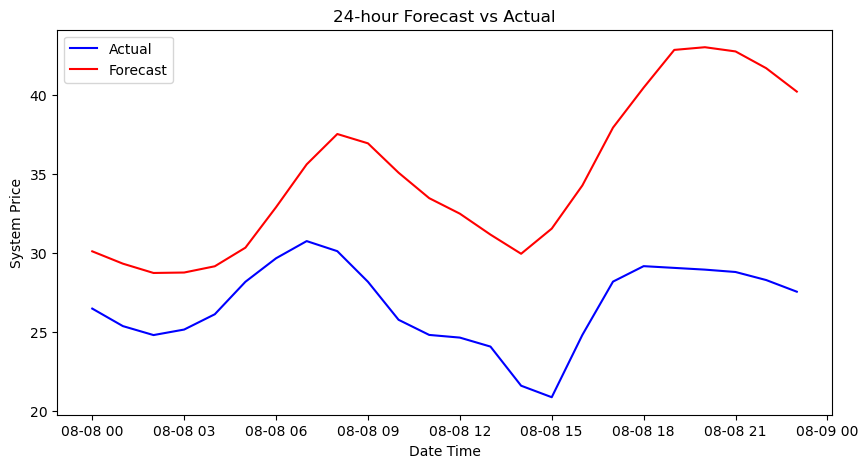

In [87]:
# Forecast the next 24 hours
forecast = results.get_forecast(steps=24)
forecast_mean_log = forecast.predicted_mean

# Revert log-transformed forecast back to original scale by exponentiation
forecast_mean = np.exp(forecast_mean_log)

# Select the actual values from the test set for the first 24 hours and exponentiate to revert the transformation
actuals_log = test['log_systemPrice'][:24]
actuals = np.exp(actuals_log)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actuals, forecast_mean))
# Calculate MAPE
mape = np.mean(np.abs((actuals - forecast_mean) / actuals)) * 100

# Print the results
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')


# Plot the forecast alongside the actual values
plt.figure(figsize=(10, 5))
plt.plot(actuals.index, actuals, label='Actual', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.title('24-hour Forecast vs Actual')
plt.xlabel('Date Time')
plt.ylabel('System Price')
plt.legend()
plt.show()

RMSE: 16.09700339402814
MAPE: 22.842714640217622%


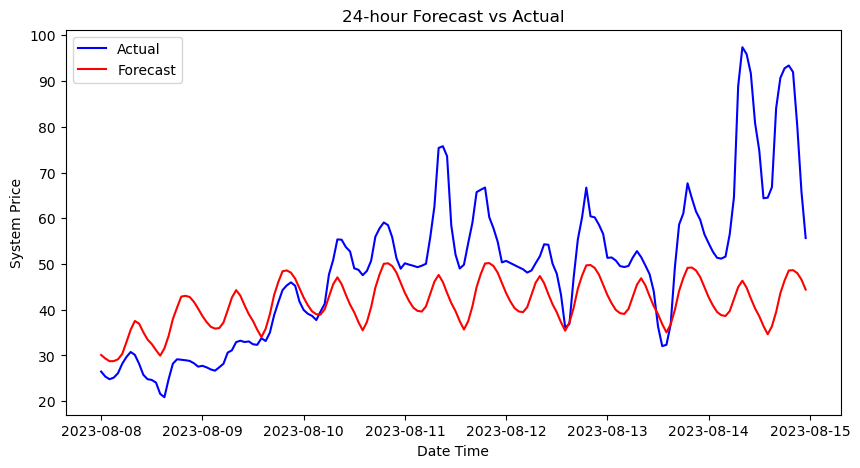

In [88]:
# Forecast the next 24 hours
forecast = results.get_forecast(steps=168)
forecast_mean_log = forecast.predicted_mean

# Revert log-transformed forecast back to original scale by exponentiation
forecast_mean = np.exp(forecast_mean_log)

# Select the actual values from the test set for the first 24 hours and exponentiate to revert the transformation
actuals_log = test['log_systemPrice'][:168]
actuals = np.exp(actuals_log)

rmse = np.sqrt(mean_squared_error(actuals, forecast_mean))
# Calculate MAPE
mape = np.mean(np.abs((actuals - forecast_mean) / actuals)) * 100

# Print the results
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

# Plot the forecast alongside the actual values
plt.figure(figsize=(10, 5))
plt.plot(actuals.index, actuals, label='Actual', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.title('24-hour Forecast vs Actual')
plt.xlabel('Date Time')
plt.ylabel('System Price')
plt.legend()
plt.show()

## Looking at residuals, they should look like white noise 

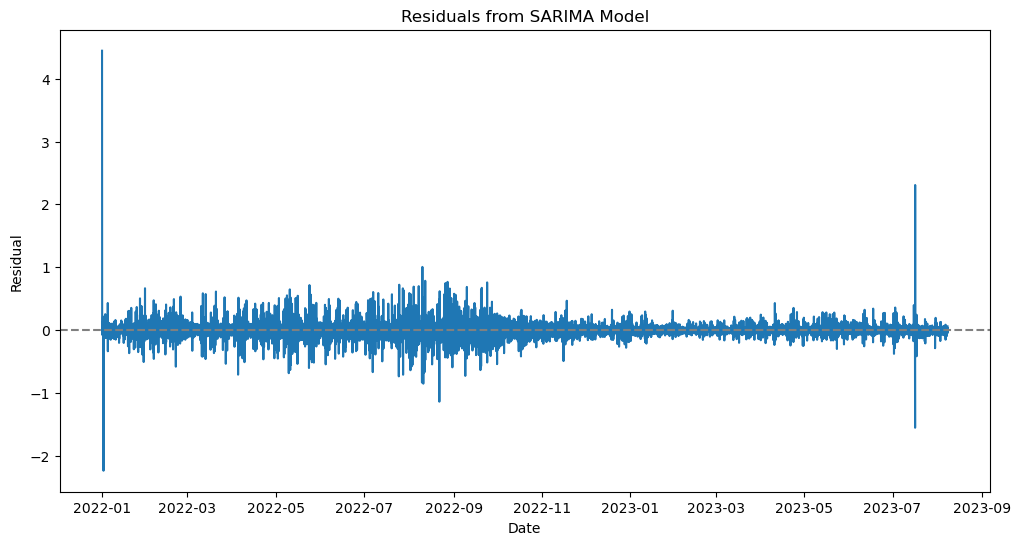

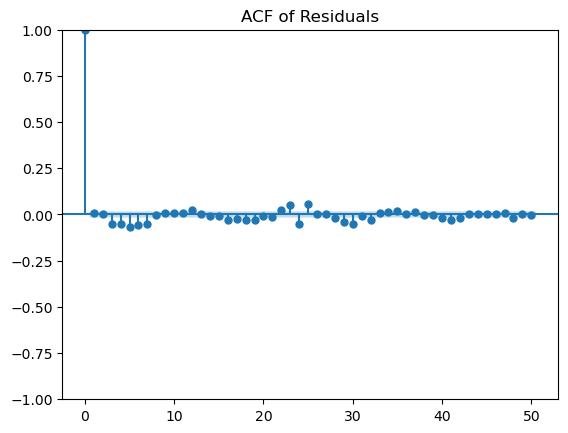

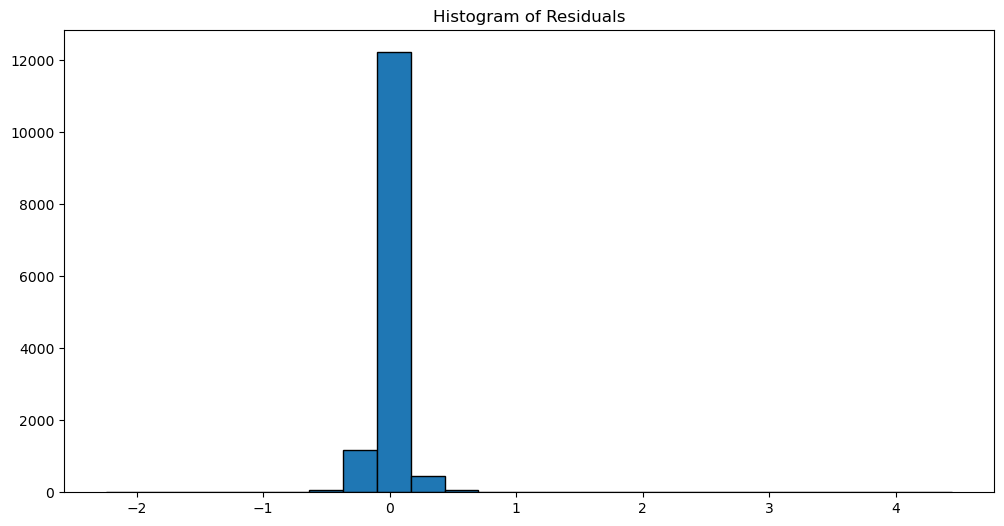

count    14015.000000
mean         0.000112
std          0.113145
min         -2.239498
25%         -0.038682
50%          0.001441
75%          0.035984
max          4.445340
dtype: float64


In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Get the residuals from the SARIMA model
residuals = results.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(0, linestyle='--', color='gray')
plt.show()

# Plot the ACF of the residuals
plot_acf(residuals, lags=50, alpha=0.05)
plt.title('ACF of Residuals')
plt.show()

# Histogram of the residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=25, edgecolor='k')
plt.title('Histogram of Residuals')
plt.show()

# Residuals description
print(residuals.describe())

In [67]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(residuals, lags=None, return_df=True)

# Output the results
print(ljung_box_results)

alpha = 0.05
if ljung_box_results['lb_pvalue'].iloc[0] < alpha:
    print(f"The residuals are not white noise (p-value = {ljung_box_results['lb_pvalue'].iloc[0]:.5f}).")
else:
    print(f"The residuals are white noise (p-value = {ljung_box_results['lb_pvalue'].iloc[0]:.5f}).")

       lb_stat     lb_pvalue
1     0.528882  4.670773e-01
2     0.540948  7.630178e-01
3    36.768188  5.151447e-08
4    75.697816  1.418427e-15
5   135.805193  1.393248e-27
6   183.246458  6.934222e-37
7   223.316470  1.304188e-44
8   223.317625  7.663752e-44
9   224.271508  2.643419e-43
10  225.294234  8.321568e-43
The residuals are white noise (p-value = 0.46708).


## Rolling forecast

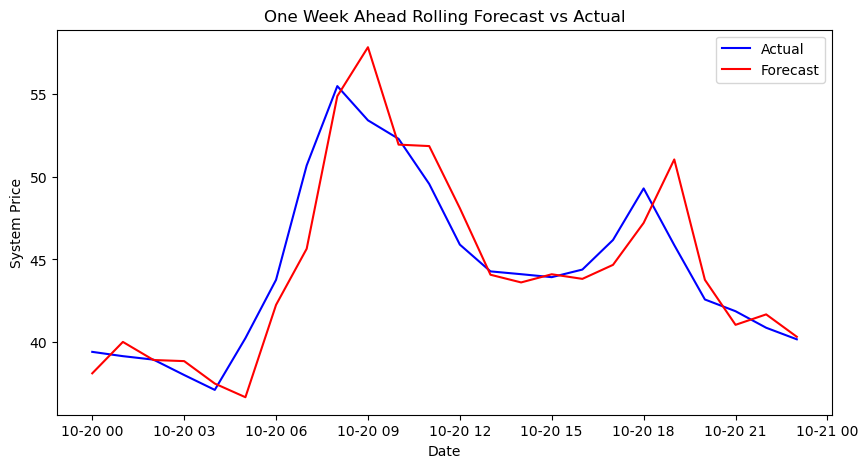

In [151]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

# Assume 'train' and 'test' DataFrames are defined with 'log_systemPrice'

# Define the ARIMA order
order = (1, 1, 1)  # Example non-seasonal order

# Initialize lists for storing predictions
predictions = []

# Prepare rolling window from the initial training data
rolling_window = train['log_systemPrice'].tolist()
window_size = len(train)

# Number of steps to forecast (one week ahead)
forecast_steps = 24 

# Ensure the test set is at least as long as the forecast_steps
actuals = test['log_systemPrice'][:forecast_steps].tolist()

# Rolling forecast for one week
for t in range(forecast_steps):
    # Fit the ARIMA model on the rolling window
    model = ARIMA(rolling_window, order=order)
    model_fit = model.fit()
    
    # Forecast the next step
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # If you're within the period you're forecasting, update the window with actuals
    # This simulates receiving new data up to the point of the actual forecast period
    if t < len(actuals):
        rolling_window.append(actuals[t])
        if len(rolling_window) > window_size:  # Keep the window size constant
            rolling_window.pop(0)

# Convert predictions from log to original scale
predictions = np.exp(predictions)

# Prepare actual values for comparison (convert back to original scale)
# This slices the 'test' DataFrame to match the forecast period exactly
actuals_for_plot = np.exp(test['log_systemPrice'][:forecast_steps])

# Plotting the forecast against actual values
plt.figure(figsize=(10, 5))
plt.plot(test.index[:forecast_steps], actuals_for_plot, label='Actual', color='blue')
plt.plot(test.index[:forecast_steps], predictions, label='Forecast', color='red')
plt.title('One Week Ahead Rolling Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('System Price')
plt.legend()
plt.show()


## Differencing (detrending and deseasonalizing)

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Perform differencing on the 'systemPrice' column to remove trends and seasonality
# First-order differencing
df_2023['price_diff_1'] = df_2023['systemPrice'].diff()

# Seasonal differencing (assuming a daily pattern in hourly data, with period 24)
df_2023['price_diff_seasonal'] = df_2023['systemPrice'].diff(24)

# Drop the NaN values created by differencing
df_2023_diff1 = df_2023['price_diff_1'].dropna()
df_2023_diff_seasonal = df_2023['price_diff_seasonal'].dropna()


# Assuming df_2023_diff1 and df_2023_diff_seasonal are loaded with the differenced data
# Perform ADF test on first-order differenced data
adf_test_diff1 = adfuller(df_2023_diff1, autolag='AIC')

# Perform ADF test on seasonally differenced data
adf_test_seasonal_diff = adfuller(df_2023_diff_seasonal, autolag='AIC')

# Output the ADF test results for first-order differencing
print("ADF Statistic (First-order Differencing): ", adf_test_diff1[0])
print("p-value (First-order Differencing): ", adf_test_diff1[1])
print("Critical Values (First-order Differencing):")
for key, value in adf_test_diff1[4].items():
    print(f'\t{key}: {value}')

# Output the ADF test results for seasonal differencing
print("\nADF Statistic (Seasonal Differencing): ", adf_test_seasonal_diff[0])
print("p-value (Seasonal Differencing): ", adf_test_seasonal_diff[1])
print("Critical Values (Seasonal Differencing):")
for key, value in adf_test_seasonal_diff[4].items():
    print(f'\t{key}: {value}')

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_44207/4172744424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['price_diff_1'] = df_2023['systemPrice'].diff()
/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_44207/4172744424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['price_diff_seasonal'] = df_2023['systemPrice'].diff(24)


ADF Statistic (First-order Differencing):  -26.344608378500755
p-value (First-order Differencing):  0.0
Critical Values (First-order Differencing):
	1%: -3.4307242852745428
	5%: -2.8617054196196627
	10%: -2.566858048572343

ADF Statistic (Seasonal Differencing):  -25.385922453415567
p-value (Seasonal Differencing):  0.0
Critical Values (Seasonal Differencing):
	1%: -3.4307247786461597
	5%: -2.861705637657079
	10%: -2.566858164630393


ADF Test Results

First-order Differencing:
- The Augmented Dickey-Fuller (ADF) statistic of -18.7301554521554 and the p-value of approximately 0 indicate that, after first-order differencing, your time series is stationary. - The ADF statistic is far below the critical values, and the p-value is significantly less than 0.05, strongly rejecting the null hypothesis of the presence of a unit root.

Seasonal Differencing:
- Similarly, the ADF statistic of -16.224653999395347 and the p-value close to 0 for the seasonally differenced data also suggest stationarity. 

Both the first-order and seasonal differencing have rendered your time series data stationary, as indicated by the significantly negative ADF statistics and the near-zero p-values in both tests. This implies that both types of differencing have effectively removed trends and seasonality from the original series, making the data suitable for further analysis with ARIMA or other time series forecasting models.